# Evidence Accumulation and Performance Criteria:


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt  # root-finding algorithm
import importlib  # Built-in module
from src import plotting
from src import utils
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
%config InlineBackend.figure_format = 'retina'

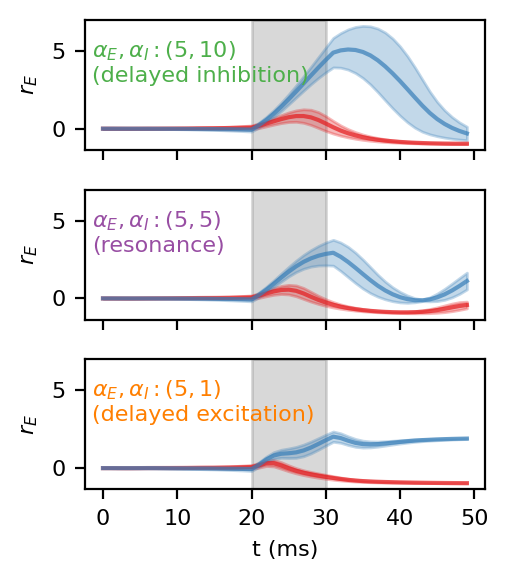

In [57]:
plotting = importlib.reload(plotting)
utils = importlib.reload(utils)

pars = utils.thesis_pars()
# pars['noise'] = np.zeros((1, 2, 50))

rngs = [np.random.default_rng(seed) for seed in range(pars["n_seeds"])]
stim_start, stim_end = pars["stimulation_period"]
coherences = np.array([rng.uniform(pars["coherence_range"][0], pars["coherence_range"][1]) for rng in rngs])

# coherences = np.array([0.5 for rng in rngs])

I_ext_E, I_ext_I = utils.get_inputs(pars["n_seeds"], pars["dimA_E"], pars["dimA_I"],pars["T"], pars["dt"], pars["stimulus_strength"], coherences, stim_start, stim_end)
noise =  utils.get_noise(rngs, pars["n_seeds"], pars["dimA_E"], pars["T"], pars["noise_mean"], pars["noise_std"])
# Simulate first trajectory

rE0, rI0 = utils.simulate_wc(**utils.thesis_pars(wEE=0.,I_ext_E=I_ext_E, I_ext_I=I_ext_I, noise=noise, rE_init=[.0, .0], rI_init=[.0, .0]))

rE1, rI1 = utils.simulate_wc(**utils.thesis_pars(wEE=0.6, I_ext_E=I_ext_E, I_ext_I=I_ext_I, noise=noise, rE_init=[.0, .0], rI_init=[.0, .0]))

rE20, rI20 = utils.simulate_wc(**utils.thesis_pars(wEE=1., tau_E=5, tau_I=10, I_ext_E=I_ext_E, I_ext_I=I_ext_I, noise=noise, rE_init=[.0, .0], rI_init=[.0, .0]))
label20 = r"$\alpha_E,\alpha_I: (5, 10)$" + f"\n(delayed inhibition)"
rE21, rI21 = utils.simulate_wc(**utils.thesis_pars(wEE=1., tau_E=5, tau_I=5, I_ext_E=I_ext_E, I_ext_I=I_ext_I, noise=noise, rE_init=[.0, .0], rI_init=[.0, .0]))
label21 = r"$\alpha_E,\alpha_I: (5, 5)$"+ f"\n(resonance)"
rE22, rI22 = utils.simulate_wc(**utils.thesis_pars(wEE=1., tau_E=5, tau_I=1, I_ext_E=I_ext_E, I_ext_I=I_ext_I, noise=noise, rE_init=[.0, .0], rI_init=[.0, .0]))
label22 = r"$\alpha_E,\alpha_I: (5, 1)$"+ f"\n(delayed excitation)"
# Visualize

plotting.my_test_plot2(pars['range_t'], stim_start, stim_end, labels=[label20, label21, label22], rE=[rE20, rE21, rE22], ord=1)
